In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [38]:
##EQUATIONS OF MOTION##
x = lambda A, omega, t: A*np.cos(omega*t)                #Position x(t)
v = lambda A, omega, t: -A*omega*np.sin(omega*t)         #Velocity v(t)
a = lambda A, omega, t: -A*omega**2*np.cos(omega*t)      #Acceleration a(t)
j = lambda A, omega, t: A*omega**3*np.sin(omega*t)       #Jerk j(t)

##ENERGY EQUATIONS##
U = lambda k, x: 0.5*k*x**2     #Potential Energy
K = lambda m, v: 0.5*m*v**2     #Kinetic Energy
E = lambda A, k: 0.5*k*A**2     #Total System Energy

##TIME DEPENDENT ENERGY EQUATIONS##
A_t = lambda y_max, m, b, t: y_max*np.exp(-(b*t)/(2*m))     #Amplitude with damping
U_t = lambda k, A, omega, t: 0.5*k*x(A, omega, t)**2        #Potential Energy U(t)
K_t = lambda m, A, omega, t: 0.5*m*v(A, omega, t)**2        #Kinetic Energy K(t)

<IPython.core.display.Javascript object>


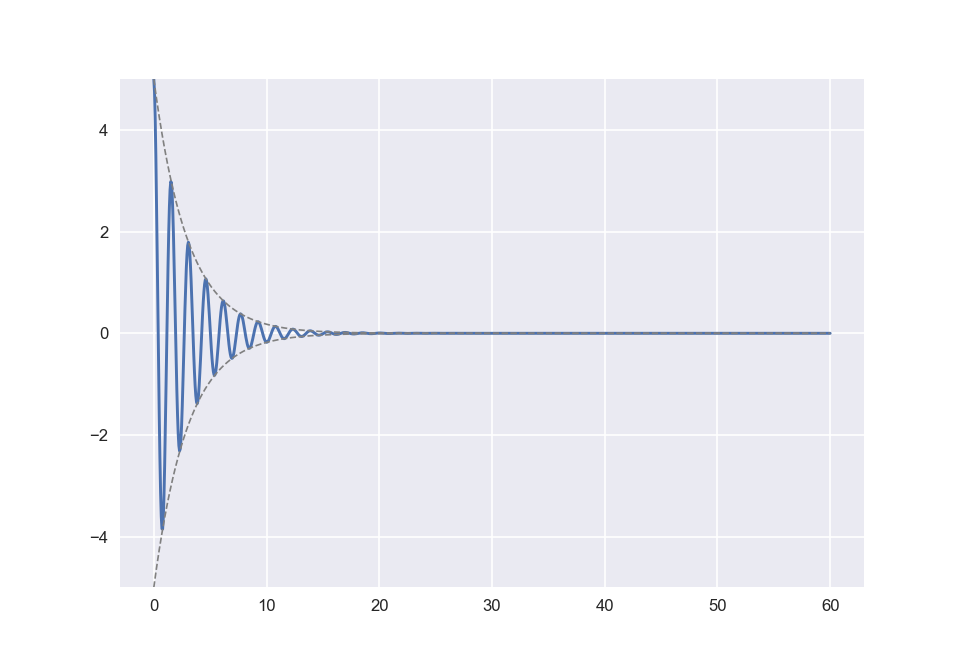

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0, step=0.5), IntSlider(value=25, descrip…

<function __main__.update(A=(0, 10, 0.5), k=(0, 50, 1), m=(0.05, 3, 0.05), b=(0, 3, 0.05))>

In [56]:
time = np.linspace(0, 60, 1000) #1000 time intervals between 0 and 60 sec

fig, ax = plt.subplots()
func_line, = ax.plot(time, np.zeros_like(time))
env_line, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
env_line2, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
ax.set_ylim(-5, 5)

def update(A=(0,10,.5), k=(0,50, 1), m=(0.05,3,0.05), b=(0,3,0.05)):
    
    func_line.set_ydata([A_t(A, m, b, t)*np.cos(w_d(k, m, b)*t) for t in time])
    env_line.set_ydata([A_t(A, m, b, t) for t in time])
    env_line2.set_ydata([-A_t(A, m, b, t) for t in time])
    fig.canvas.draw_idle()
    
    
widgets.interact(update)

In [ ]:
# plt.plot(time, pos_damped)
plt.plot(time, env, '--', linewidth=1, color='black')
plt.plot(time, env_2, '--', linewidth=1, color='black')
plt.plot(time, np.zeros_like(time), linewidth=1, color='black')